# Machine Learning with Scikit-Learn: Sales Prediction

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv")

In [3]:
# Printing first five rows of data.

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Cleaning

In [4]:
# Printing number of missing values in each column.

data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
# Printing a concise summary of data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Analysis

### Analysis 1:

Analyzing the correlation between sales and TV advertisement.

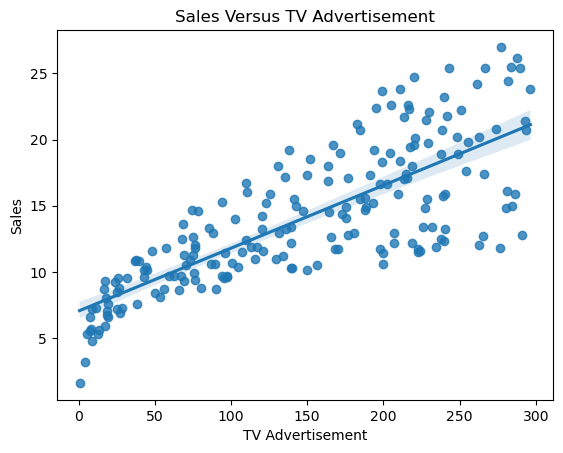

In [6]:
# Plotting a linear regression plot for sales versus TV advertisement.

sns.regplot(data, x="TV", y="Sales")
plt.title("Sales Versus TV Advertisement")
plt.xlabel("TV Advertisement")
plt.ylabel("Sales")
plt.show()

### Conclusion 1:

Sales and TV advertisement are strongly correlated.

### Analysis 2:

Analyzing the correlation between sales and radio advertisement.

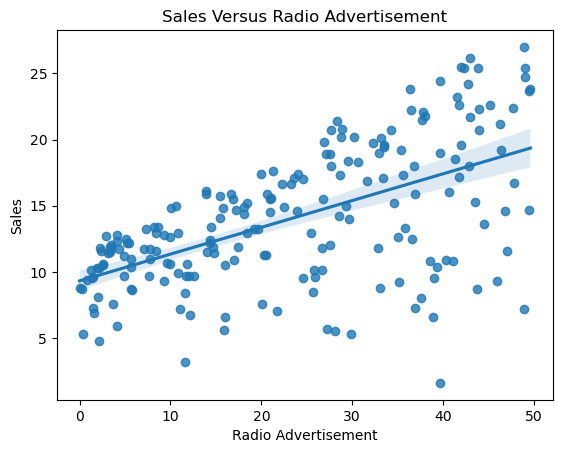

In [7]:
# Plotting a linear regression plot for sales versus radio advertisement.

sns.regplot(data, x="Radio", y="Sales")
plt.title("Sales Versus Radio Advertisement")
plt.xlabel("Radio Advertisement")
plt.ylabel("Sales")
plt.show()

### Conclusion 2:

Sales and radio advertisement are weakly correlated.

### Analysis 3:

Analyzing the correlation between sales and newspaper advertisement.

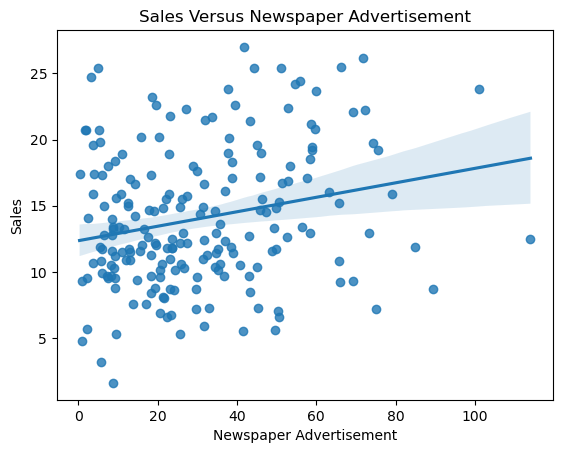

In [8]:
# Plotting a linear regression plot for sales versus newspaper advertisement.

sns.regplot(data, x="Newspaper", y="Sales")
plt.title("Sales Versus Newspaper Advertisement")
plt.xlabel("Newspaper Advertisement")
plt.ylabel("Sales")
plt.show()

### Conclusion 3:

Sales and newspaper advertisement are not correlated.

## Correlation Analysis

In [9]:
# Calculating pairwise correlation of columns.

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


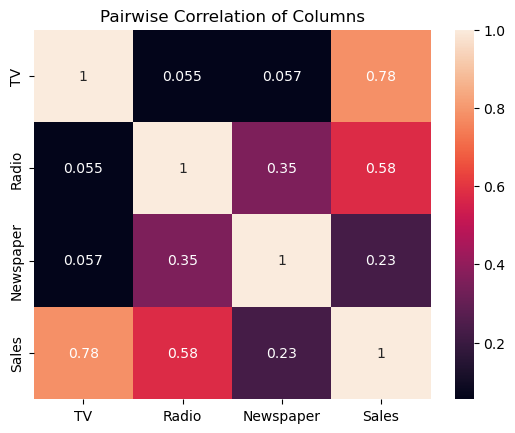

In [10]:
# Plotting a heatmap for pairwise correlation of columns.

sns.heatmap(data.corr(), annot=True)
plt.title("Pairwise Correlation of Columns")
plt.show()

## Feature Selection

In [11]:
# Assigning feature matrix.

X = data.drop("Sales", axis=1)

# Assigning target vector.

y = data["Sales"]

In [12]:
# Printing feature matrix shape.

print("Feature Matrix Shape:", X.shape)

# Printing target vector shape.

print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (200, 3)
Target Vector Shape: (200,)


## Machine Learning

In [13]:
# Splitting data into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Building a random forest regressor model.

model = RandomForestRegressor()

# Fitting model on training set.

model.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
# Predicting regression target for testing set.

y_prediction = model.predict(X_test)

In [16]:
# Printing coefficient of determination of prediction.

print("Accuracy Score: ", model.score(X_test, y_test))

# Printing R^2 regression score.

print("R^2 Score: ", r2_score(y_test, y_prediction))

# Printing mean absolute error.

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_prediction))

# Printing mean absolute percentage error.

print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_prediction))

# Printing mean squared error.

print("Mean Squared Error: ", mean_squared_error(y_test, y_prediction))

# Printing root mean squared error.

print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_prediction)))

Accuracy Score:  0.979829181583801
R^2 Score:  0.979829181583801
Mean Absolute Error:  0.5873636363636362
Mean Absolute Percentage Error:  0.05517218541565307
Mean Squared Error:  0.5205879393939395
Root Mean Squared Error:  0.7215178025481697


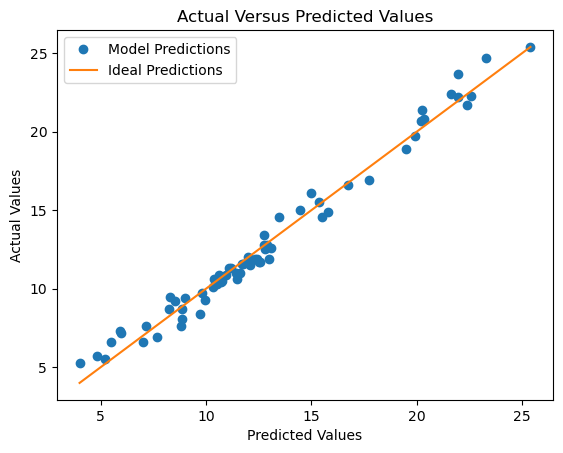

In [17]:
# Plotting a scatter plot for actual versus predicted values.

plt.plot(y_prediction, y_test, "o", label="Model Predictions")
minimum = min(min(y_prediction), min(y_test))
maximum = max(max(y_prediction), max(y_test))
plt.plot([minimum, maximum], [minimum, maximum], label="Ideal Predictions")
plt.title("Actual Versus Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()